In [1]:
import pandas as pd
import numpy as np

housing = pd.read_csv("BostonHousing.csv")
housing.shape

(506, 14)

In [2]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
housing.info()
#rm 결측치 5개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
med = housing['rm'].median()
housing['rm'] = housing['rm'].fillna(med)

In [13]:
print(housing.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [4]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값) - 종속변수 (위의 건 독립변수)

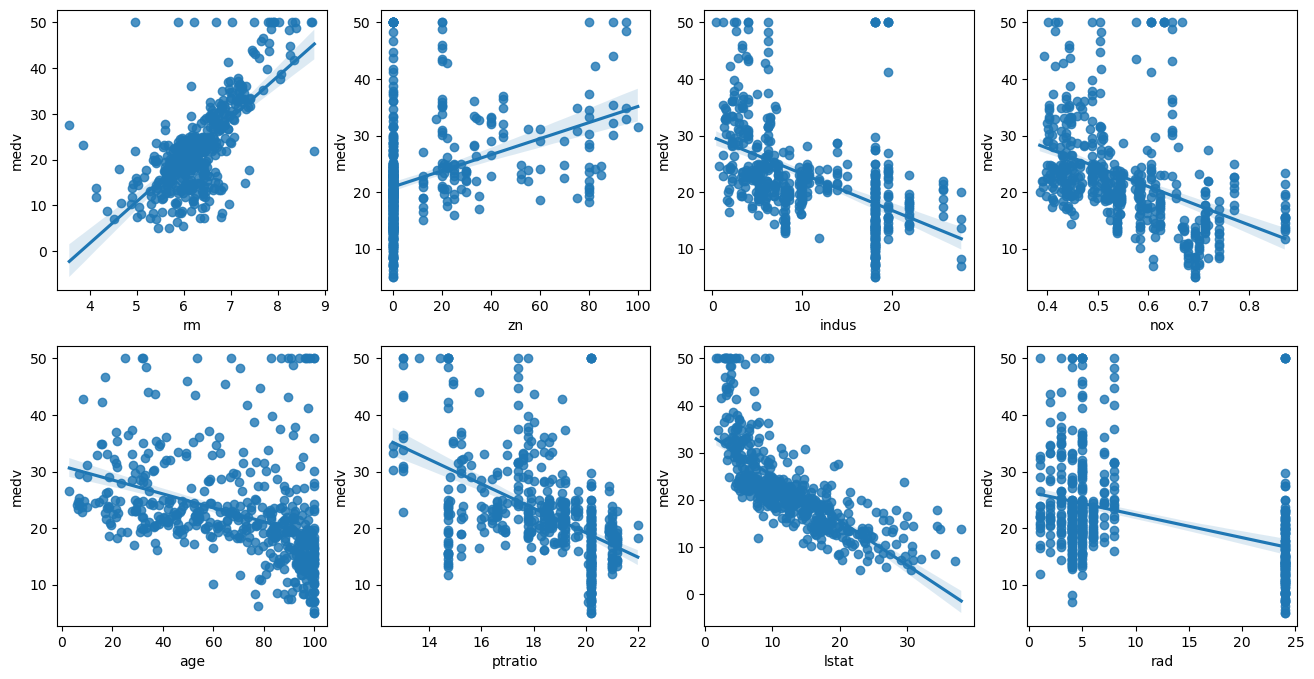

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2x4 subplot 이용. axs는 4x2 
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['rm','zn','indus','nox','age','ptratio','lstat','rad']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4
    
    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='medv', data=housing, ax=axs[row][col])

#집값 상승과 상관관계 best : RM (방 갯수)
#집값 하락과 상관관계 best : LSTAT (하위계층 비율)

In [14]:
#사이킷런 train, test 분리하고 학습/예측/평가 수행
#라쏘(Lasso Regression)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# feature, target 데이터 분리
y_target = housing['medv'] # 레이블(종속변수)
X_data = housing.drop(['medv'], axis=1, inplace=False) # 피처(독립변수)

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.2, random_state=2023)

# Linear Regression 
model = Lasso(alpha = 0.5)

# fit 메소드 학습 
model.fit(X_train, y_train)

Lasso(alpha=0.5)

In [15]:
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [16]:
# predict 메소드 : 학습된 모델로 예측을 수행
y_preds = model.predict(X_test) 
print(y_preds[0:5])

# rmse를 활용한 평가
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

[18.95344184 17.30092597 28.0480672  22.41160766 25.85789317]
MSE : 26.255, RMSE: 5.124
Variance score : 0.735


In [18]:
#독립변수들에 대한 추정 회귀계수들
print(model.intercept_) #절편
print(model.coef_) #회귀계수

31.383909635648372
[-8.37972331e-02  4.27657538e-02 -1.26141219e-02  0.00000000e+00
 -0.00000000e+00  2.30854242e+00  1.03004206e-03 -7.98047664e-01
  2.28559681e-01 -1.34360792e-02 -6.24047911e-01  7.32318971e-03
 -6.59581990e-01]
